# tinybEEr Project

## Marcus Deichman, Julia Combs, Jasmine Gill

Notebook will create, train, and compress the beer classification model that will be deployed on the tinyML device

# import necessary packages


In [12]:
# import all necessary packages 

import pandas as pd
import re
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# for min/max scaling
from sklearn.preprocessing import MinMaxScaler

# for machine learning data prep
from sklearn.model_selection import train_test_split # used to split the data into training and test sets
from sklearn.datasets import make_blobs


# download the data

In [13]:
# read in data into dataframe

beer_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/beer_cleaned.csv'
breweries_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/brewery_cleaned.csv'

# visualize the data as data frame
beer_df = pd.read_csv(beer_url)
breweries_df = pd.read_csv(breweries_url)
beer_df.head(4)

,abv,ibu,beer_id,beer_name,style,style_group,ounces,brewery_id
0,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),American Pale Ale (APA),12.0,177
1,0.099,92.0,1036,Lower De Boom,American Barleywine,other,8.4,368
2,0.079,45.0,1024,Fireside Chat,Winter Warmer,other,12.0,368
3,0.044,42.0,876,Bitter American,American Pale Ale (APA),American Pale Ale (APA),12.0,368


In [14]:
# split the data into abv, ibu, beer_name, and style as float values

abv_flt = beer_df['abv'].astype(float)
ibu_flt = beer_df['ibu'].astype(float)

# look at organization of data
print('abv_flt:', abv_flt) 
print('ibu_flt:', ibu_flt)

print(max(ibu_flt))

abv_flt: 0       0.061
1       0.099
2       0.079
3       0.044
4       0.049
        ...  
1321    0.077
1322    0.069
1323    0.060
1324    0.067
1325    0.055
Name: abv, Length: 1326, dtype: float64
ibu_flt: 0       60.0
1       92.0
2       45.0
3       42.0
4       17.0
        ... 
1321    30.0
1322    69.0
1323    50.0
1324    45.0
1325    40.0
Name: ibu, Length: 1326, dtype: float64
138.0


In [15]:
# encode the styles list text --> numeric values

# def unique(list):

#     list_set = set(list)

#     unique_list = (list(list_set))
    
styles = beer_df['style']

styles_set = set(styles)
stylesList = list(styles_set)
# stylesDict = dict(stylesList)

print(stylesList)

classList = []

for beer in beer_df:
    print(beer)
    # for i, style in enumerate(stylesList):
    #     if beer['styles'] == style:
    #         classList.append(i)

print(classList)

['Hefeweizen', 'Märzen / Oktoberfest', 'German Pilsener', 'Belgian Strong Dark Ale', 'Tripel', 'Fruit / Vegetable Beer', 'English Strong Ale', 'American Amber / Red Ale', 'English Stout', 'Bière de Garde', 'American Double / Imperial IPA', 'Smoked Beer', 'Vienna Lager', 'American Stout', 'Munich Dunkel Lager', 'American Strong Ale', 'Schwarzbier', 'Keller Bier / Zwickel Bier', 'Abbey Single Ale', 'English India Pale Ale (IPA)', 'American Brown Ale', 'Belgian Strong Pale Ale', 'Berliner Weissbier', 'American Barleywine', 'Foreign / Export Stout', 'English Pale Ale', 'American Pale Wheat Ale', 'Bock', 'Euro Pale Lager', 'Flanders Oud Bruin', 'Wheat Ale', 'American Double / Imperial Stout', 'California Common / Steam Beer', 'American Dark Wheat Ale', 'Milk / Sweet Stout', 'Winter Warmer', 'Light Lager', 'Saison / Farmhouse Ale', 'Roggenbier', 'Doppelbock', 'Belgian IPA', 'American Porter', 'Witbier', 'English Dark Mild Ale', 'Other', 'American Blonde Ale', 'Russian Imperial Stout', 'Oatme

In [16]:
whos

Variable           Type         Data/Info
-----------------------------------------
MinMaxScaler       type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
abv_flt            Series       0       0.061\n1       0.<...>gth: 1326, dtype: float64
abv_flt_array      ndarray      1326: 1326 elems, type `float64`, 10608 bytes
abv_flt_minmax     ndarray      1326x1: 1326 elems, type `float64`, 10608 bytes
abv_flt_reshaped   ndarray      1326x1: 1326 elems, type `float64`, 10608 bytes
beer               str          brewery_id
beer_df            DataFrame            abv   ibu  beer_i<...>\n[1326 rows x 8 columns]
beer_url           str          https://raw.githubusercon<...>cleaning/beer_cleaned.csv
breweries_df       DataFrame         brewery_id          <...>n\n[558 rows x 4 columns]
breweries_url      str          https://raw.githubusercon<...>aning/brewery_cleaned.csv
classList          list         n=0
ibu_flt            Series       0       60.0\n1       92.<...>gth: 1326

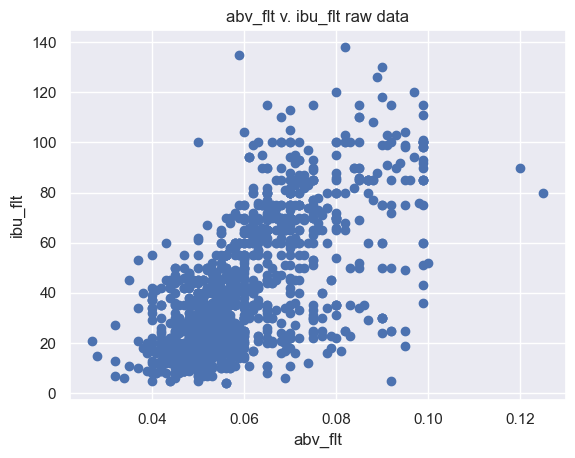

In [17]:
# plot the raw abv and ibut data
plt.scatter(
    x = abv_flt, 
    y = ibu_flt)
plt.title('abv_flt v. ibu_flt raw data')
plt.xlabel('abv_flt')
plt.ylabel('ibu_flt')
plt.show()

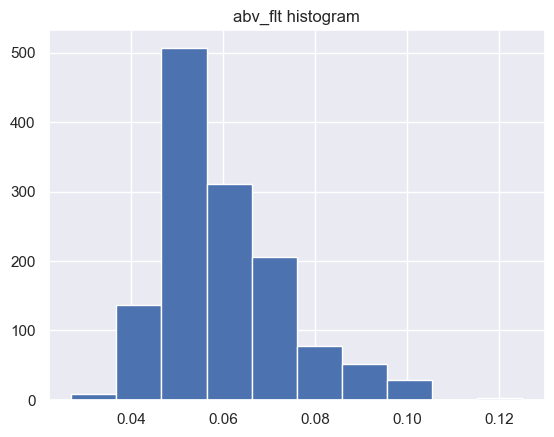

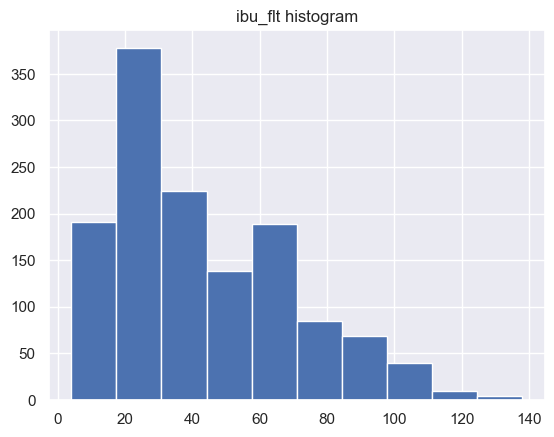

In [18]:
# look at the histogram of the abv_flt and ibu_flt data
abv_flt.hist()
plt.title('abv_flt histogram')
plt.show()
ibu_flt.hist()
plt.title('ibu_flt histogram')
plt.show()


From the scatter plot of the raw data, and the histograms it is evident that the abv data is very collected in a very small range. In order to distinguish the data, min-max scaling will be used.

REASON: Features with higher ranging numbers contribute more to distance metrics hence the decision of the ML algorithms will be influenced more by the high magnitude features. 

In [19]:
# use min-max scaling to separate the abv data
# y = (x – min) / (max – min)

abv_flt_array = abv_flt.to_numpy()
abv_flt_reshaped = abv_flt_array.reshape(-1, 1)
abv_flt_minmax = MinMaxScaler(feature_range=(0, 138.0)).fit_transform(abv_flt_reshaped)

ibu_flt_array = ibu_flt.to_numpy()
ibu_flt_reshaped = ibu_flt_array.reshape(-1, 1)
ibu_flt_minmax = MinMaxScaler().fit_transform(ibu_flt_reshaped)


C:\Users\marcu\AppData\Local\Temp\ipykernel_24196\3577459839.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x=abv_flt_minmax, y=ibu_flt, cmap='viridis')


Text(0, 0.5, 'ibu_flt')

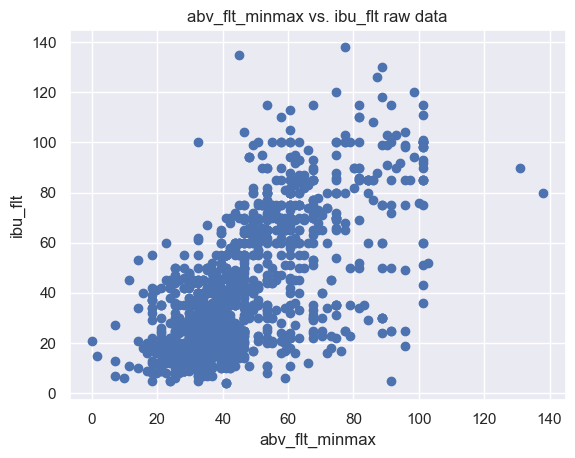

In [20]:
plt.scatter(x=abv_flt_minmax, y=ibu_flt, cmap='viridis')
plt.title('abv_flt_minmax vs. ibu_flt raw data')
plt.xlabel('abv_flt_minmax')
plt.ylabel('ibu_flt')

In [21]:
# split the data into training and testing sets

#abv_train, abv_test, ibu_train, ibu_test, beer_name_train, beer_name_test, style_train, style_test = train_test_split(abv, ibu, beer_name, style, test_size = 0.2)

# abv_ibu_train, abv_ibu_test = train_test_split(abv_ibu, test_size=0.3)

# abv_ibu_xtrain_minmax = MinMaxScaler().fit_transform(abv_ibu_train[:, 0].reshape(-1, 1))
# abv_ibu_ytrain_minmax = MinMaxScaler().fit_transform(abv_ibu_train[:, 1].reshape(-1, 1))

# print(abv_ibu[:, 0])
# print(abv_ibu_xtrain_minmax)


In [22]:
# num_train_data = abv_ibu_train.shape[0]
# print('Number of training data points:', num_train_data)

# num_test_data = abv_ibu_test.shape[0]
# print('Number of testing data point:', num_test_data)


In [23]:
# num_centers = 10

# from sklearn.cluster import KMeans
# kmeans= KMeans(n_clusters=num_centers)
# kmeans.fit(abv_ibu_train)

# y_kmeans = kmeans.predict(abv_ibu_train)
# y_kmeans

# # plt.scatter(abv_ibu_train[:,0], abv_ibu_train[:,1])
# plt.scatter(abv_ibu_train[:, 0], abv_ibu_ytrain_minmax)

# print(y_kmeans)

# look at different dataset with "srm"

In [24]:
# different beer cvs file

#beers_url = "https://raw.githubusercontent.com/aureliusbd/tinybEEr/main/beers.csv"

#beer_opendata_df = pd.read_csv(beers_url)
#beer_opendata_df.head(3)



In [25]:
#srm = beer_opendata_df.to_numpy()[:,7]
#abv_beers = beer_opendata_df.to_numpy()[:,5]
#print('srm shape orig:', srm.shape)

#def convert_to_float(value):
    #try:
        #return float(value)
    #except ValueError:
        #return np.nan
    
#srm_flt = np.vectorize(convert_to_float)(srm)
#abv_beers_flt = np.vectorize(convert_to_float)(abv_beers)

#print('srm new shape:', srm_flt.shape)

#print('srm_flt:', srm_flt)


#def convert_to_float_2(value):
    #try:
        #cleaned_value = re.sub(r'[^\d.]+', '', value)  # Remove non-numeric characters
        #return float(cleaned_value)
    #except ValueError:
        #return np.nan


#print('abv:', abv_beers_flt)

In [26]:
#plt.scatter(srm_flt, abv_beers_flt)
#plt.xlabel('srm')
#plt.ylabel('abv_beers')

In [27]:
# determine how many values are not zero
#nonzero_val = np.count_nonzero(srm_flt > 0)
#zero_val = np.count_nonzero(srm_flt == 0)
#print('Number of nonzero SRM values in dataset:', nonzero_val)
#print('Number of zeros in dataset:', zero_val)